# Exploración de archivos

In [1]:
import pandas as pd
import os

In [2]:
folder = 'datos_EthicApp/2021.CD1100/'

files = [file for file in os.listdir(folder) if '.csv' in file]

In [4]:
ejemplo = '2021.CD1100.09.CJ.A3.csv'

# df = pd.read_csv(folder + ejemplo, delimiter=';',index_col='id')
for file in files:
    df = pd.concat([pd.read_csv(folder + file, delimiter=';',index_col='id') for file in files])
df = df.drop(columns=['name','rut'])
print("cantidad de filas: {}".format(len(df)))
df.head()

cantidad de filas: 5095


,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time
id,,,,,,,,,,,,
11511,2695,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Si estudiaste y sabes hacer los ejercicios ¿pa...,1,2021-05-19T02:23:09.528Z
11515,2702,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,5,No debería usar la información ya que no es co...,1,2021-05-19T02:49:39.214Z
11516,2701,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,4,si es que no sabe realizar la pregunta puede r...,1,2021-05-19T02:49:40.029Z
11517,2700,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,3,lamentablemente este pais es muy injusto y la ...,1,2021-05-19T02:53:11.462Z
11519,2707,NaN,M,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Considerando que Julieta pudo optar por una be...,1,2021-05-19T03:16:45.404Z


In [7]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

[Proporcione argumentos para justificar su respuesta]. En el último control realizado Julieta se ve en la posibilidad de copiar una respuesta que fue compartida en el grupo de WhatsApp de su sección. Julieta en esta situación a la que se ve enfrentada en el control debiera:
1	Usar la información del grupo de WhatsApp
6	No usar la información del grupo de WhatsApp


In [8]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('Cantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      4339
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment        34
phase           0
time            0
dtype: int64

Cantidad de valores únicos por columna:


user_id       819
team_id       247
gender          3
df              1
title          21
opt_left        2
opt_right       2
max_num         2
sel             7
comment      5004
phase           6
time         5095
dtype: int64

In [9]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 5061


## Exploración básica del texto

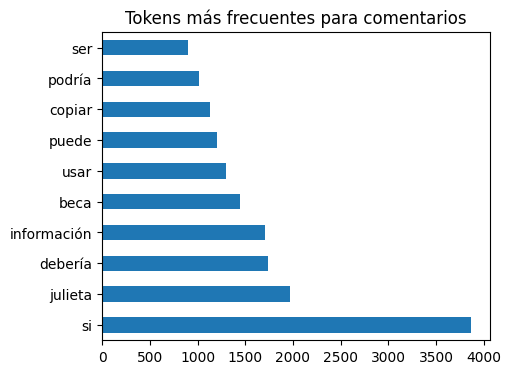

In [10]:
from exploration_utils import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

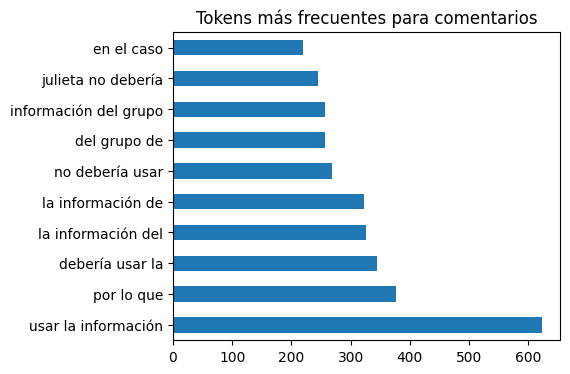

In [11]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

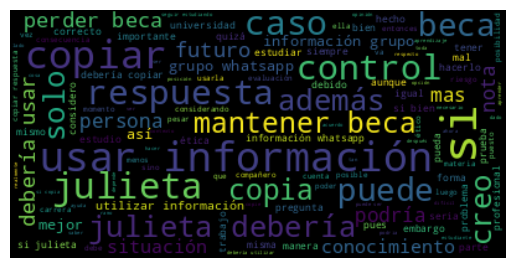

In [12]:
from exploration_utils import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))